# Machine Learning with Boston House Prices Dataset

### Importar Dataset

In [14]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

columns = ['CRIM','ZN','INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Load the Boston housing dataset
data = pd.read_csv('../datasets/housing.csv', delim_whitespace=True, names=columns)
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

# Success
print('Boston housing dataset has {0} data points with {1} variables each'.format(*data.shape))

# show first 3 samples
data.head(3)

Boston housing dataset has 506 data points with 14 variables each


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


### Dataset Information

In [2]:
# show dataset info
data.info()

# show dataset statistical description
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Calculate Statistics about price characteristic

In [3]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)
# Alternative using pandas
# minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = np.max(prices)
# Alternative using pandas
# maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = np.mean(prices)
# Alternative using pandas
# mean_price = prices.mean()

# TODO: Median price of the data
median_price = np.median(prices)
# Alternative using pandas
# median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)
# Alternative using pandas 
# std_price = prices.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(prices, 25)
third_quartile = np.percentile(prices, 75)
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))
print("First quartile of prices: ${:,.2f}".format(first_quartile))
print("Second quartile of prices: ${:,.2f}".format(third_quartile))
print("Interquartile (IQR) of prices: ${:,.2f}".format(inter_quartile))

Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19
First quartile of prices: $17.02
Second quartile of prices: $25.00
Interquartile (IQR) of prices: $7.98


### Distribution bell curve or normal distribution: Skew

In [4]:
# show degree of distortion of the distribution
#If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
#If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
#If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.
data.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

### Check skew

Skew for LSTAT is 0.9064600935915367
Skew for LSTAT corrected is 0.30739050802674955


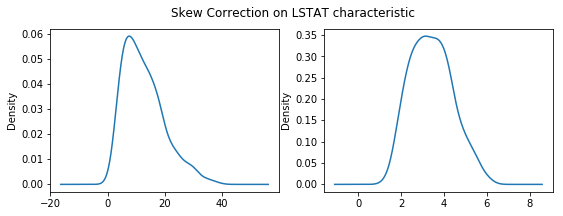

In [5]:
# get LSTAT Series to be checked
dfLSTAT = data['LSTAT']
print('Skew for LSTAT is ' + str(dfLSTAT.skew()))

# correct the positive skew about 0.906460 applying square root
dfLSTATC = np.sqrt(data['LSTAT'])
print('Skew for LSTAT corrected is ' + str(dfLSTATC.skew()))

# densitive distribution before and after correction
plt.figure(figsize=(9, 3))
plt.subplot(121)
dfLSTAT.plot(kind='density')
plt.subplot(122)
dfLSTATC.plot(kind='density')
plt.suptitle('Skew Correction on LSTAT characteristic')
plt.show()

### Distribution bell curve or normal distribution: Kurtosis

In [6]:
# show tails of the distribution. Measure of outliers present in the distribution.
# Leptokurtic (Kurtosis > 3): Distribution is longer, tails are fatter. data are heavy-tailed or profusion of outliers
# Platykurtic: (Kurtosis < 3): tails are thinner than the normal distribution, data are light-tailed or lack of outliers
data.kurtosis()

CRIM       37.130509
ZN          4.031510
INDUS      -1.233540
CHAS        9.638264
NOX        -0.064667
RM          1.891500
AGE        -0.967716
DIS         0.487941
RAD        -0.867232
TAX        -1.142408
PTRATIO    -0.285091
B           7.226818
LSTAT       0.493240
MEDV        1.495197
dtype: float64

### Histogram plot (univariate plots)

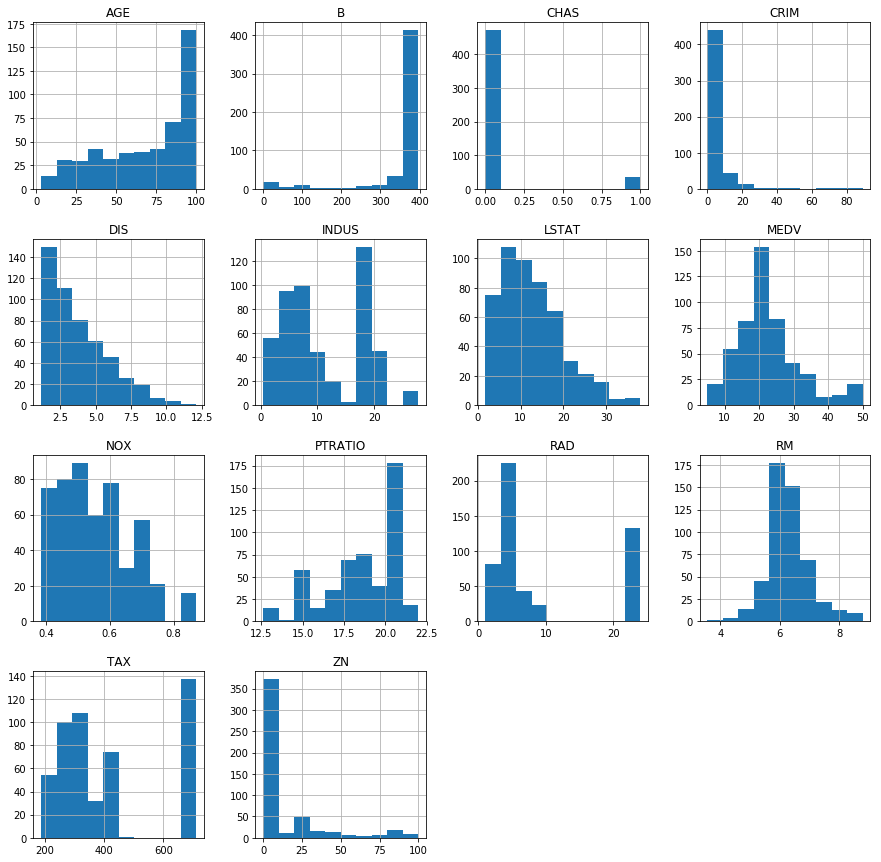

In [8]:
# Univariate Histogram Plots
fig = plt.figure(figsize=[15,15])
ax = fig.gca()
data.hist(ax=ax)

plt.show()

### Visualize density plot

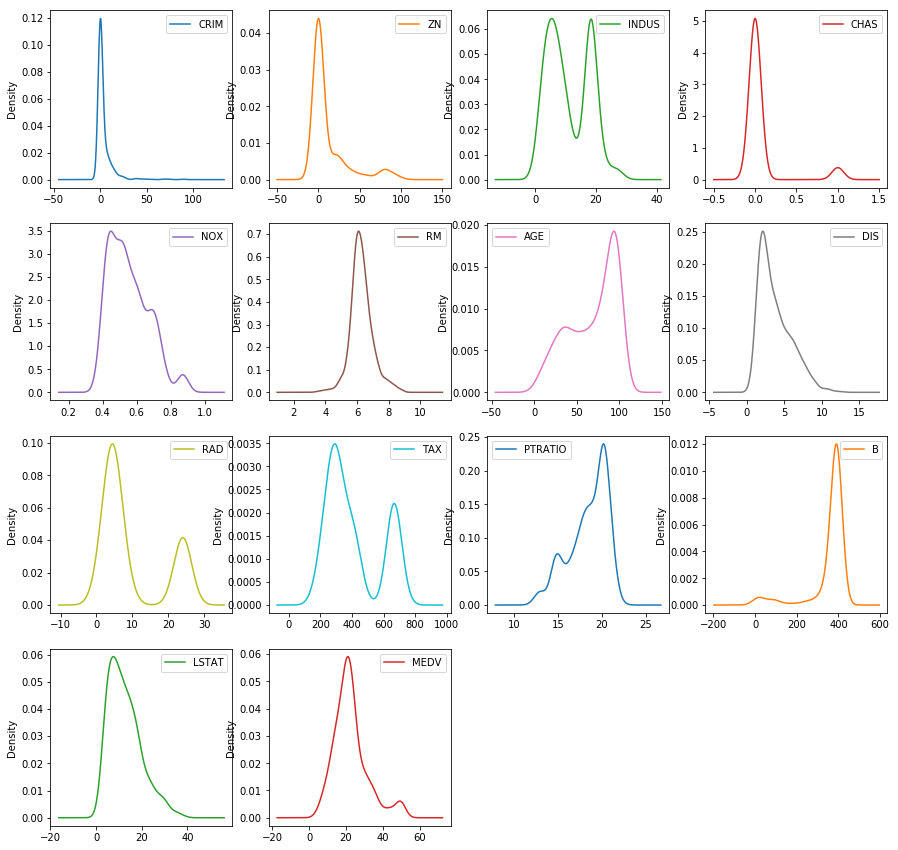

In [10]:
# Univariate Density Plots
fig = plt.figure(figsize=[15,15])
ax = fig.gca()

data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, ax=ax)

plt.show()

### Visualize Box and Whisker Plot

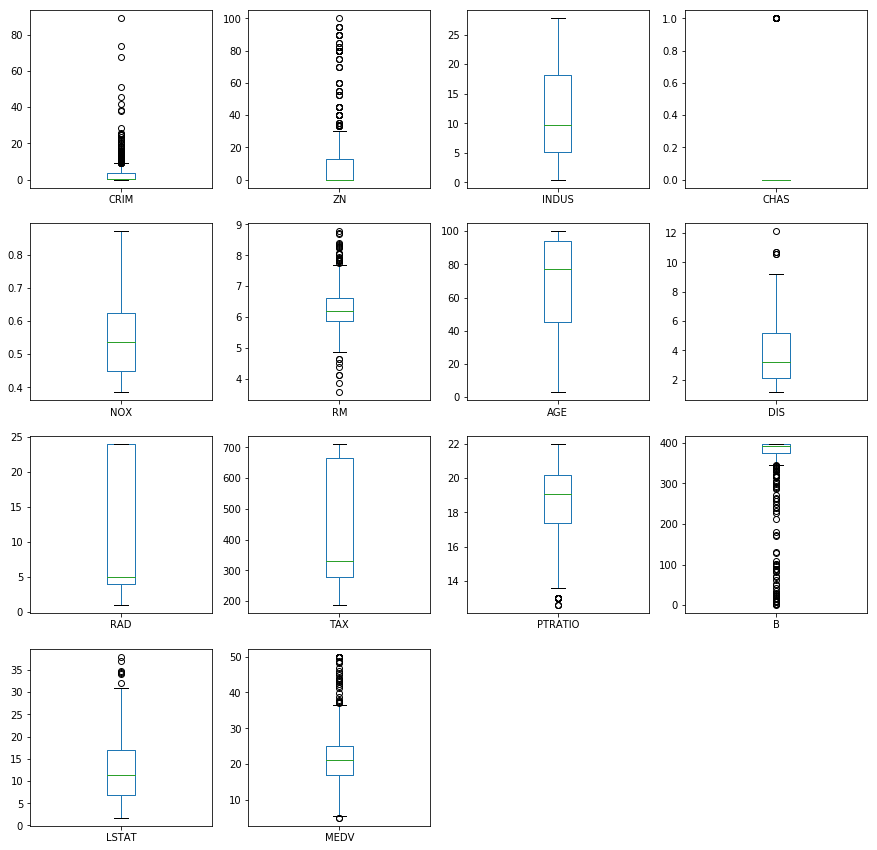

In [11]:
# Univariate Density Plots
fig = plt.figure(figsize=[15,15])
ax = fig.gca()

data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, ax=ax)

plt.show()

### Visualize correlate matrix (multivariate plot)

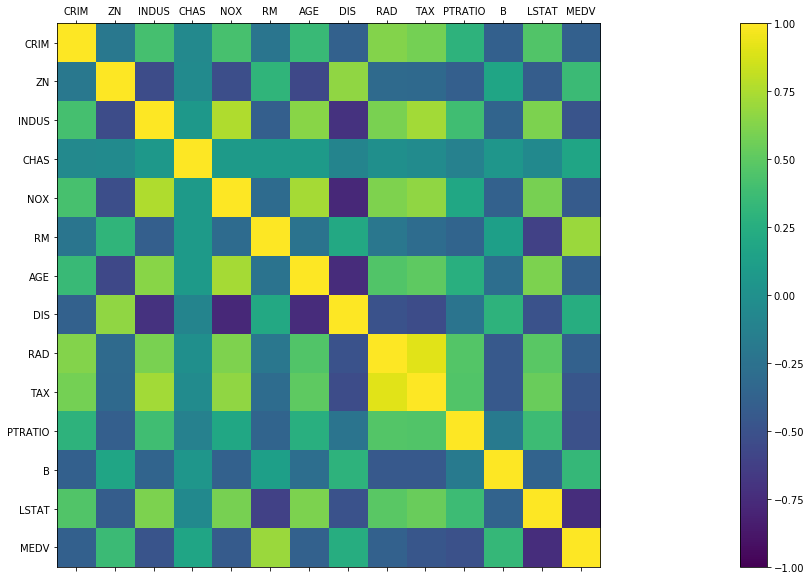

In [15]:
# correlation matrix
correlations = data.corr()

# plot correlation matrix¡
fig = plt.figure(figsize=(50, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(list(data.columns)),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

### Visualize correlation characteristics

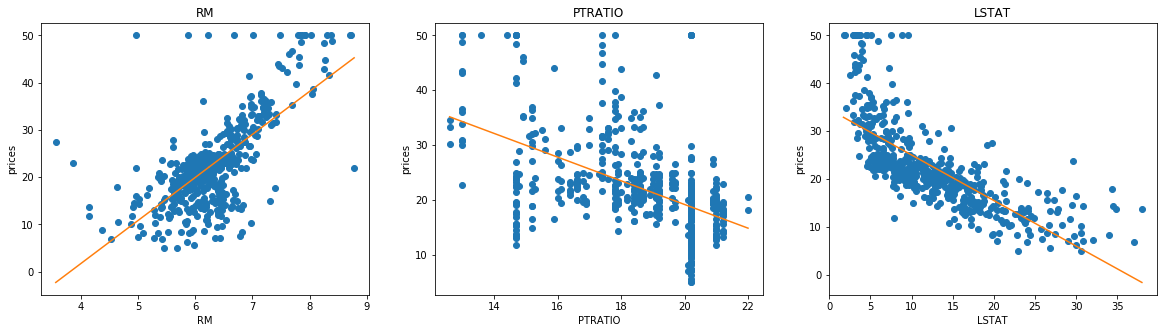

In [13]:
# Using pyplot
plt.figure(figsize=(20, 5))

# i: index
k=0
for i, col in enumerate(features.columns):
    if (col in ['RM','LSTAT','PTRATIO']):
        # 3 plots here hence 1, 3
        plt.subplot(1, 3, k+1)
        x = data[col]
        y = prices
        plt.plot(x, y, 'o')
        # Create regression line
        plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel('prices')
        
        k=k+1
    
